In [ ]:
# Working with data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

# Tools for visualizations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from math import ceil

# Feature selection
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import RFE, SelectKBest, RFECV, f_classif
from sklearn.linear_model import LogisticRegression, LassoCV
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
%pip install boruta
from boruta import BorutaPy

# Models
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
#from sklearn.neighbors import KNeighborsClassifier
from  sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.5 MB/s eta 0:00:00


# **Data Preprocessing and Data Exploration**

In [ ]:
data = pd.read_csv('train.csv', index_col ='encounter_id', na_values=['?', '[]'])

In [ ]:
data.tail().T

encounter_id,660160,826429,332030,757560,459757
country,USA,USA,USA,USA,USA
patient_id,24531381,4663818,23397147,52161750,88410897
race,AfricanAmerican,AfricanAmerican,Caucasian,Caucasian,Caucasian
gender,Female,Female,Female,Male,Male
age,[80-90),[70-80),[60-70),[60-70),[70-80)
weight,NaN,NaN,NaN,NaN,NaN
payer_code,MC,NaN,NaN,BC,BC
outpatient_visits_in_previous_year,0,0,0,0,0
emergency_visits_in_previous_year,1,0,2,0,0
inpatient_visits_in_previous_year,0,0,2,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   66166 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 2246 non-null   object
 6   payer_code                             43035 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_specia

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,71236,1,USA,71236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
patient_id,71236.0,NaN,NaN,NaN,54302279.330984,38795850.347332,135.0,23396510.25,45305631.0,87558374.25,189502619.0
race,66166,5,Caucasian,50693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,71236,3,Female,38228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,67679,10,[70-80),17359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,2246,9,[75-100),933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,43035,17,MC,22683,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.369588,1.287469,0.0,0.0,0.0,0.0,42.0
emergency_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.196249,0.910854,0.0,0.0,0.0,0.0,76.0
inpatient_visits_in_previous_year,71236.0,NaN,NaN,NaN,0.640154,1.267271,0.0,0.0,0.0,1.0,21.0


<Axes: >

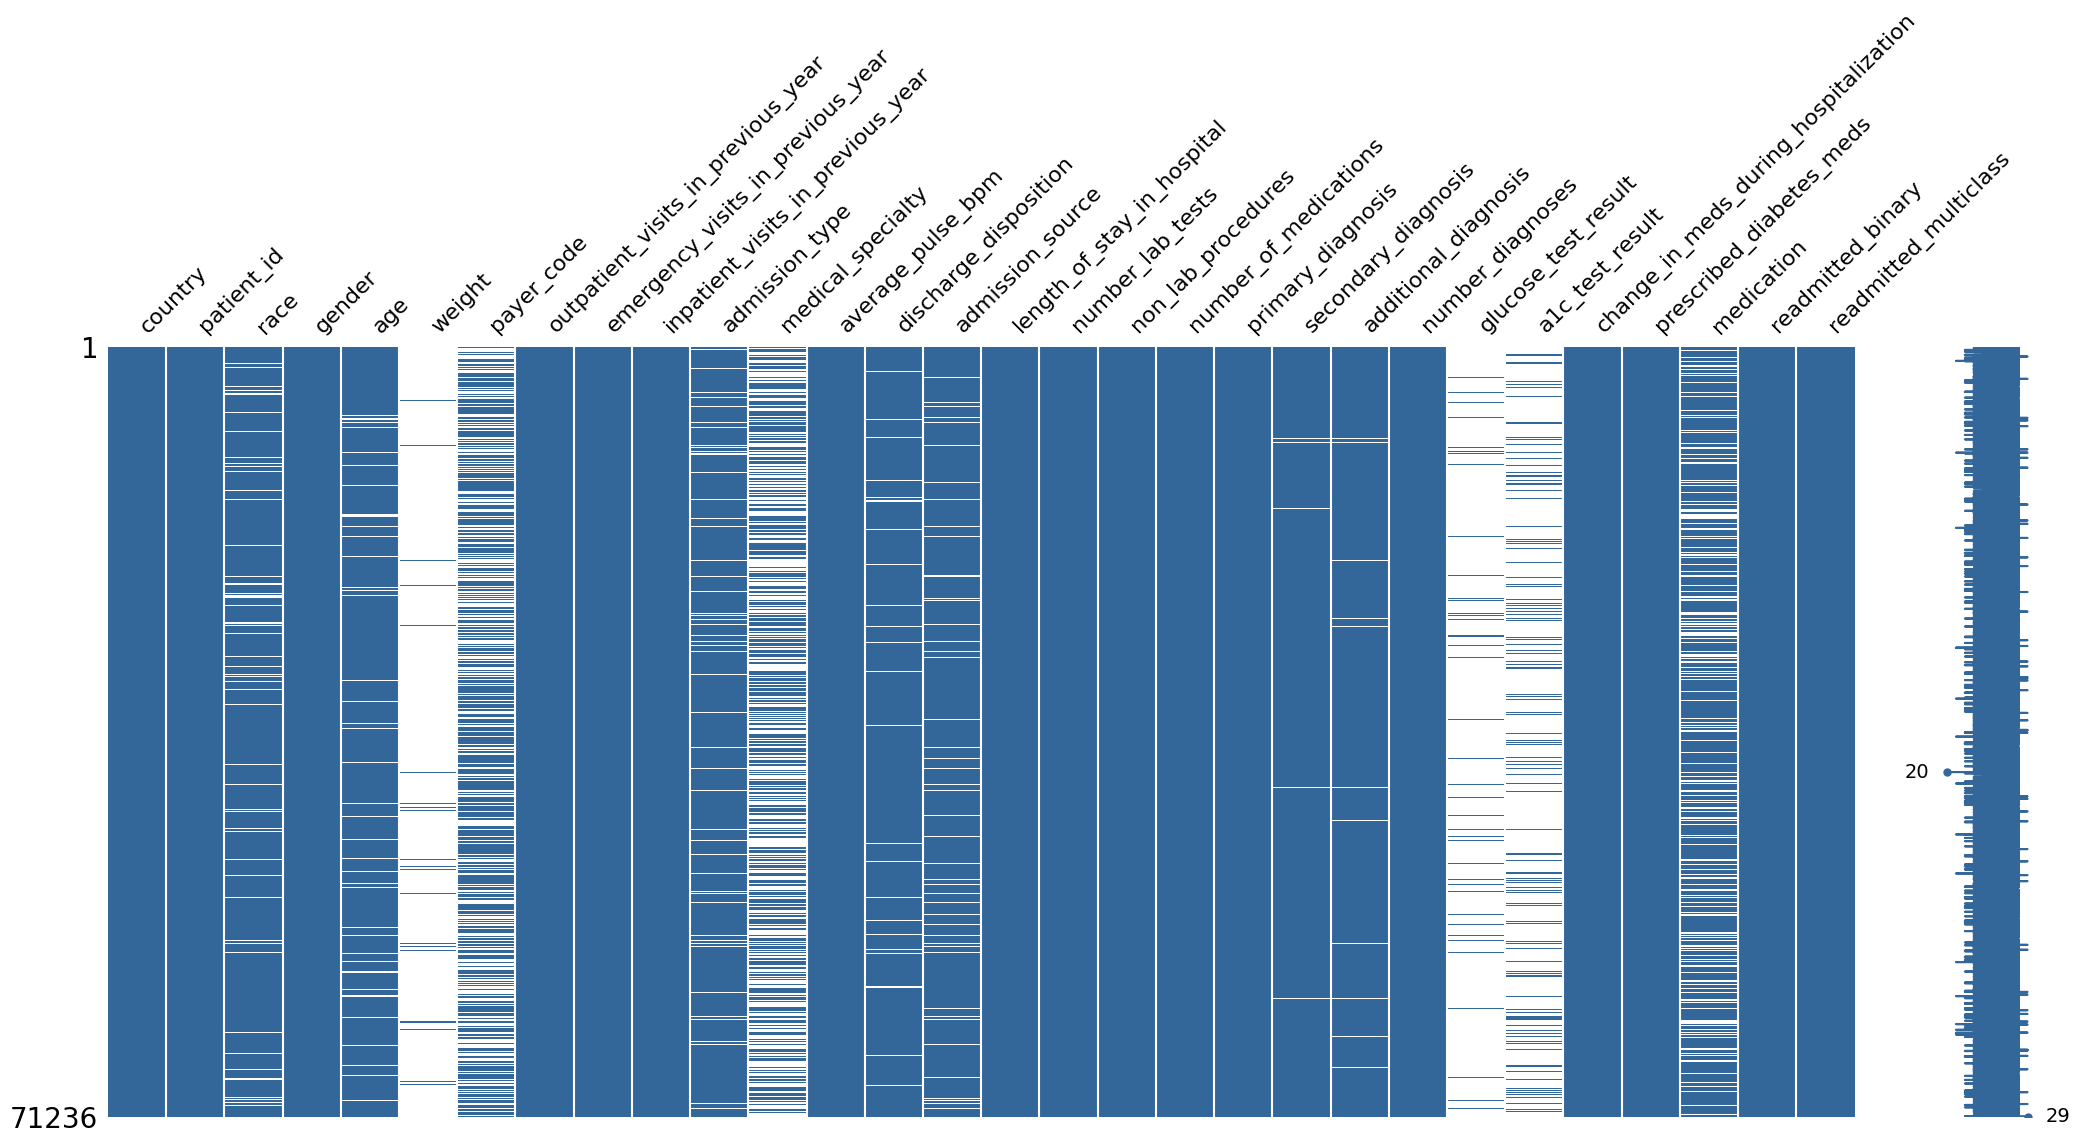

In [ ]:
# Bar chart showing missing values
msno.matrix(data, color=(0.2, 0.4, 0.6))

In [ ]:
# No duplicated rows
data.duplicated().sum()

np.int64(0)

In [ ]:
data['readmitted_binary'].value_counts(normalize=True)

,proportion
readmitted_binary,
No,0.888399
Yes,0.111601


# **Transforming/organizing data**

In [ ]:
# Renaming variables
new_names = {'outpatient_visits_in_previous_year':'outpatient_visits',
             'emergency_visits_in_previous_year':'emergency_visits',
             'inpatient_visits_in_previous_year': 'inpatient_visits',
             'length_of_stay_in_hospital':'length_of_stay',
             'change_in_meds_during_hospitalization':'change_in_meds'
            }
data = data.rename(columns=new_names)

In [ ]:
# Variables for metric and non metric features
metric_feats = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'average_pulse_bpm', 'length_of_stay', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses', 'patient_id']
non_metric_feats = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 'age', 'admission_type', 'discharge_disposition', 'admission_source', 'primary_diagnosis', 'secondary_diagnosis','additional_diagnosis', 'medication', 'country', 'weight', 'medical_specialty']

# **Outliers and Metric Variables**

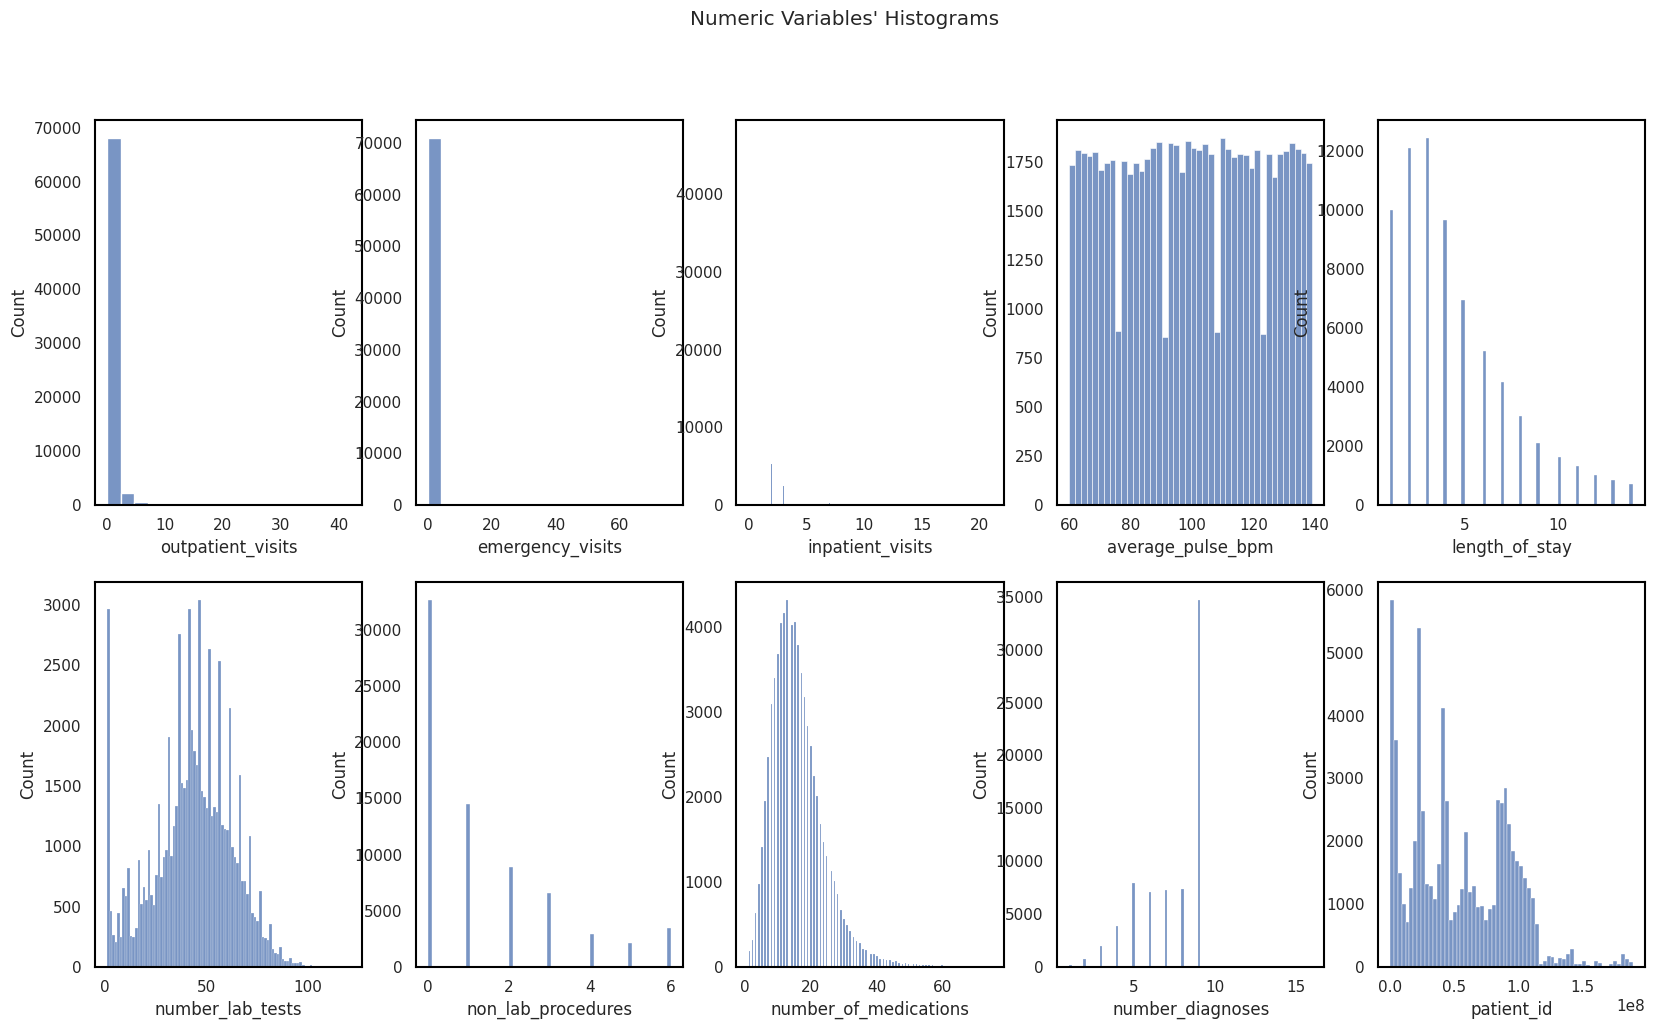

In [ ]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_feats):
    sns.histplot(x=data[feat], ax=ax)

# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title)
plt.show()

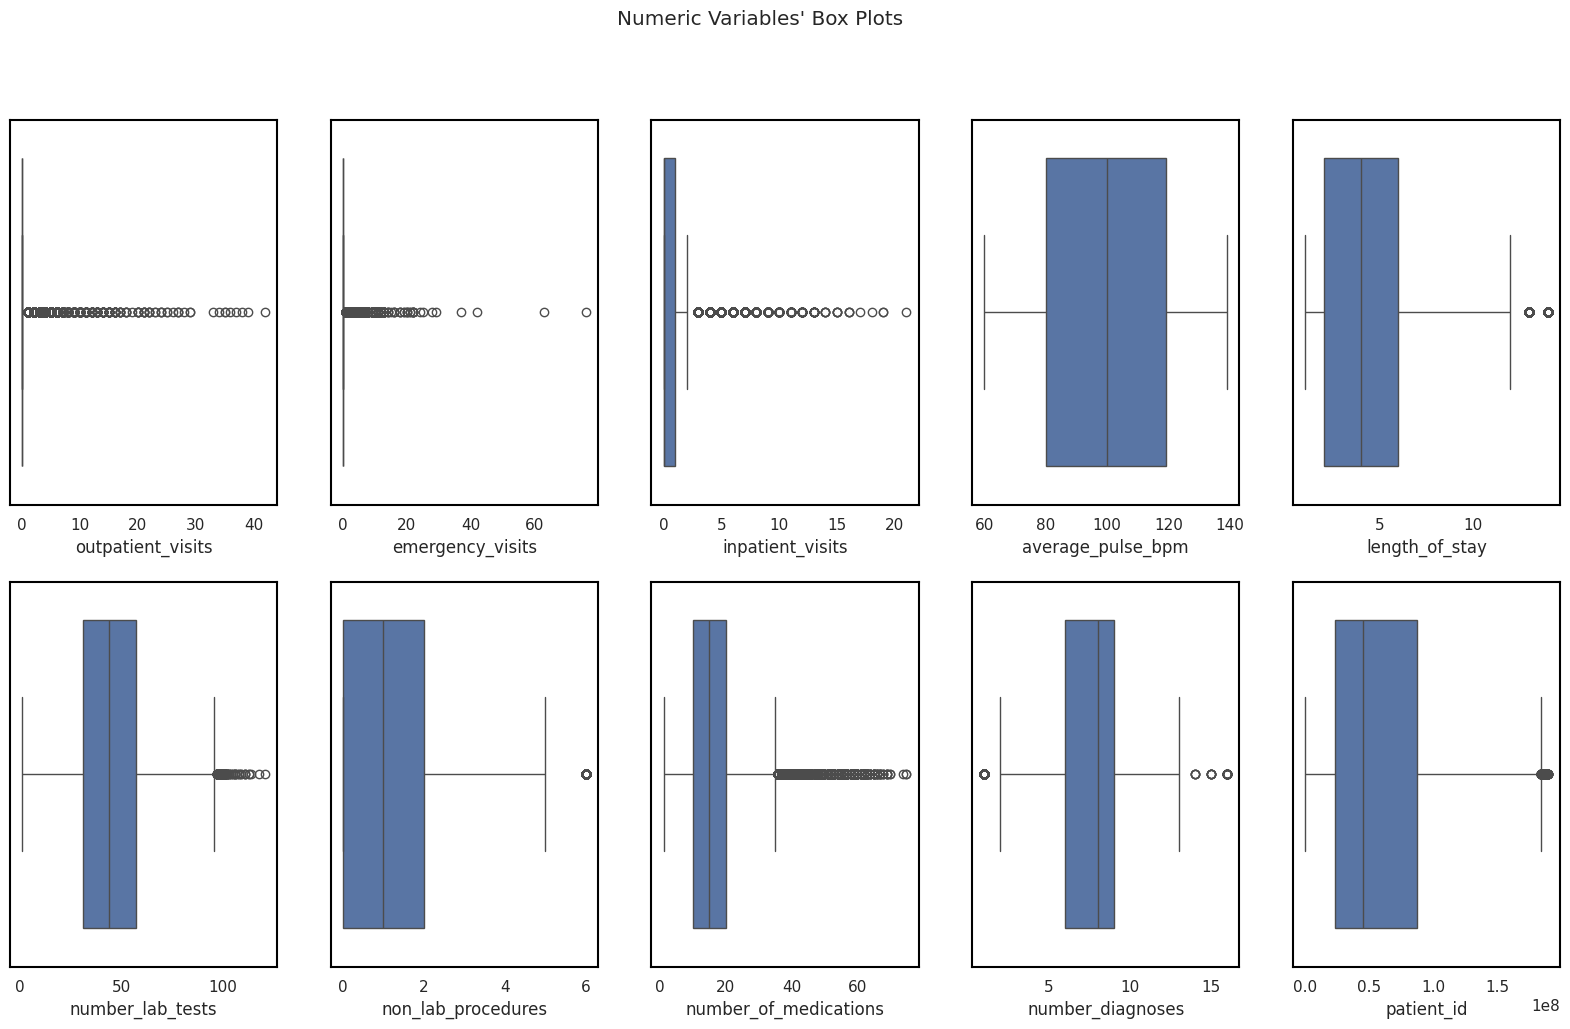

In [ ]:
# Boxplots to visualise outliers
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

# **Transformations**

In [ ]:
#in the variables that have the distributions right skewed
feats_to_log = ['outpatient_visits', 'emergency_visits', 'inpatient_visits', 'length_of_stay', 'non_lab_procedures', 'number_of_medications']
# Log transformation of metric features
data[feats_to_log] = np.log1p(data[feats_to_log])

# Square transformation of 'number_diagnoses'
data['number_diagnoses'] = data['number_diagnoses']^2

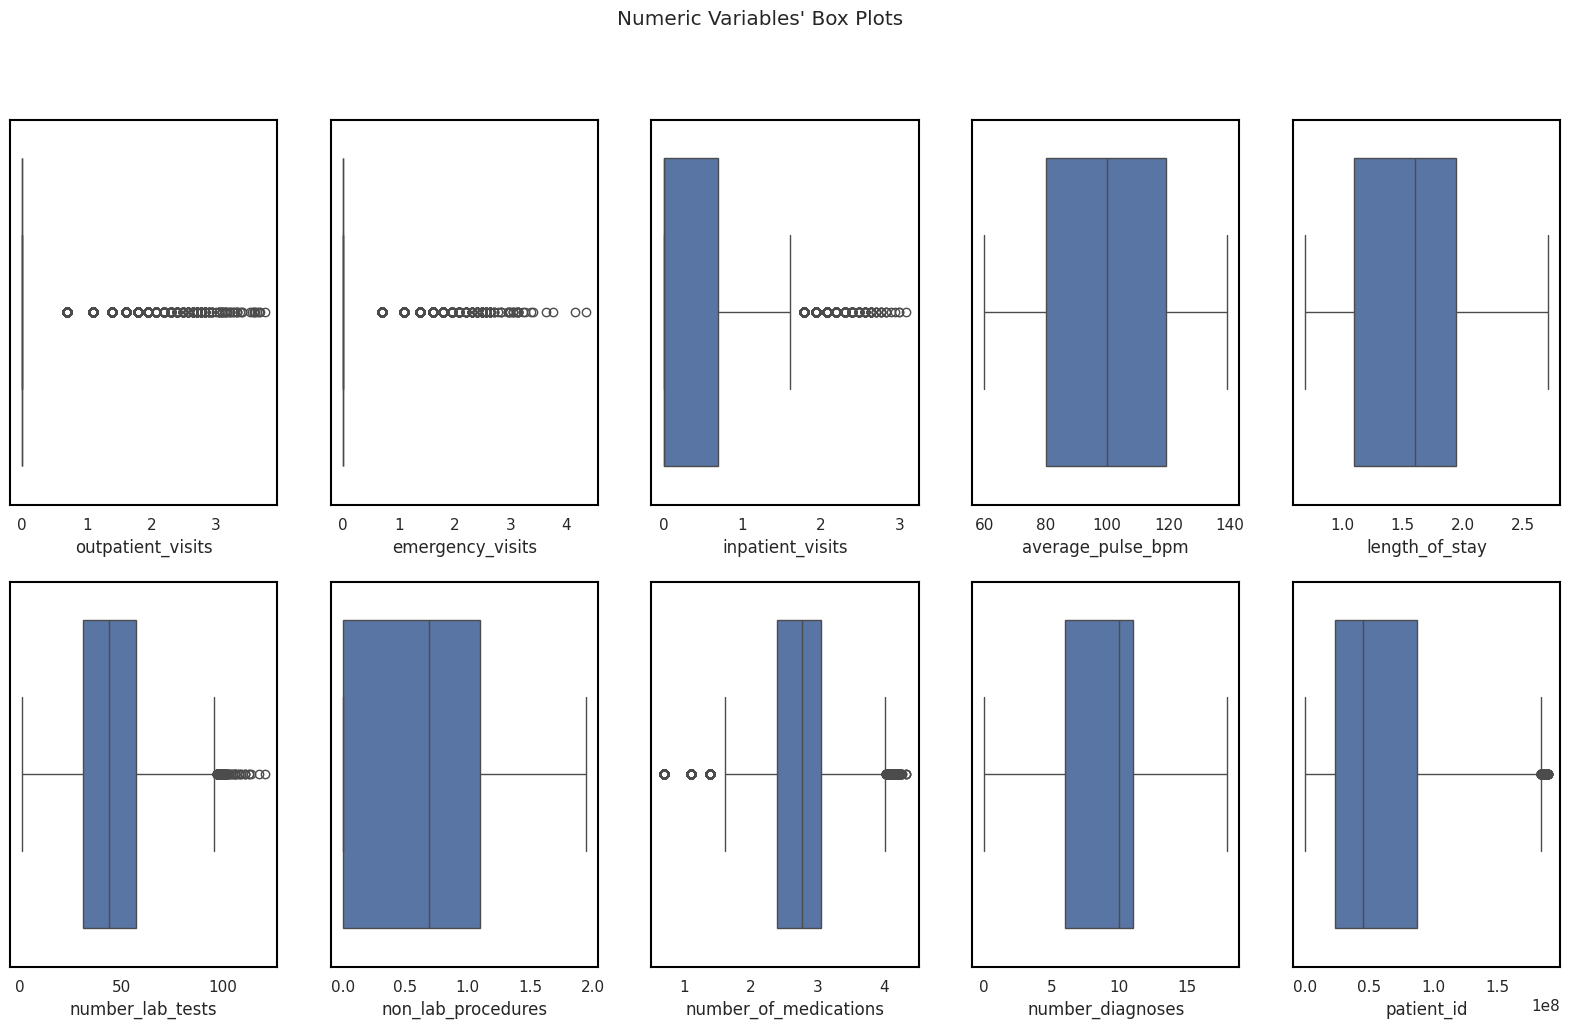

In [ ]:
# Boxplots to visualise outliers
# we need to visualie again to see the differences from the log transformations
sns.set()
fig, axes = plt.subplots(2, ceil(len(metric_feats) / 2), figsize=(20, 11))

for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)

for ax, feat in zip(axes.flatten(), metric_feats):
    sns.boxplot(x=data[feat], ax=ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

In [ ]:
# msno.matrix(data, color=(0.2, 0.3, 0.7))

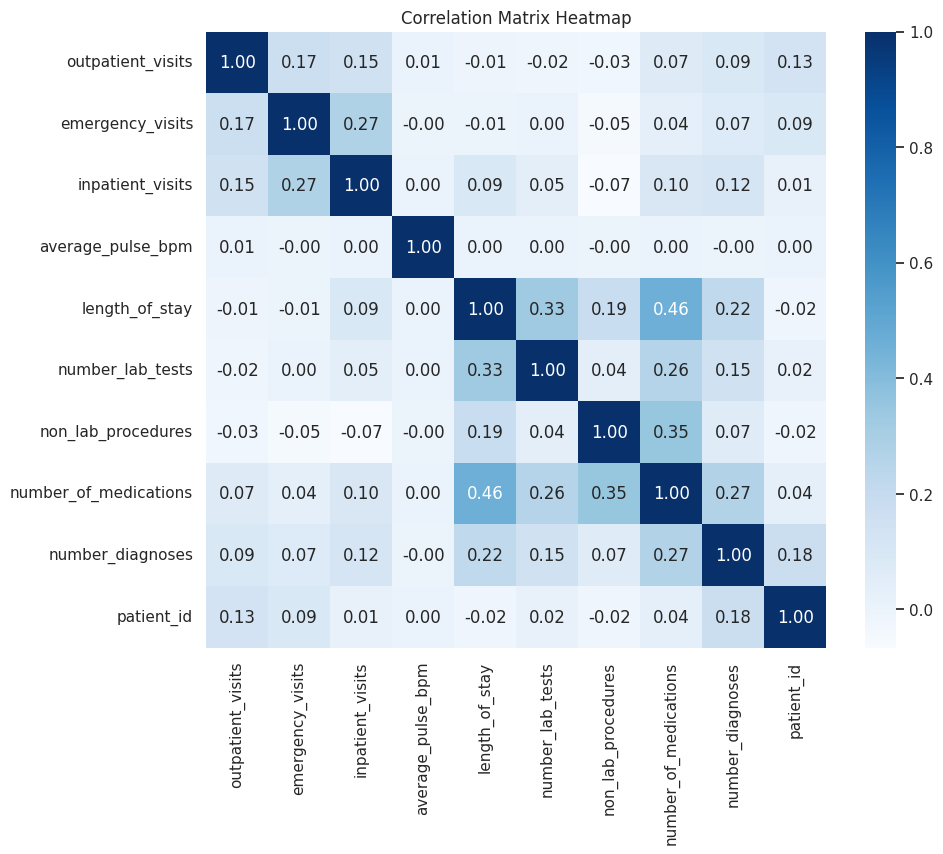

In [ ]:
# Correlation Matrix
correlation_matrix = data[metric_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.

In the following heatmap the only values that are somewhat related are number_of_medications and length_of_stay, but considering that the value is only 0.46, taking these values into account would be too far-fetched.

In [ ]:
# average_pulse_bpm isn't correlated with any of the other variables. Therefore, can be dropped since it doesn't provide usefull information
data.drop('average_pulse_bpm', axis=1, inplace=True)

metric_feats.remove('average_pulse_bpm')

Outliers removal for Metric Variables
Metric features have no missing values, so we can proceed to outlier removal.

Removing outliers using Z-Score.

In [ ]:
df_zz = data[metric_feats].copy()
z = np.abs(stats.zscore(df_zz))
threshold = 3
df_zzz = df_zz[(z < 3).all(axis=1)]

print(df_zz.shape)
print(df_zzz.shape)
print("Numbers of rows deleted:", df_zz.shape[0]-df_zzz.shape[0], "\nThat makes", np.round(((df_zz.shape[0]-df_zzz.shape[0])/df_zz.shape[0])*100, 2), "% of the data.")

(71236, 9)
(65358, 9)
Numbers of rows deleted: 5878 
That makes 8.25 % of the data.


Removing outliers using IQR Score.
IQR Score is a variable option of outliers removal only if there is more than one dataset, so we can ignore that. Should we write about it in report??

In [ ]:
df_aa = data[metric_feats].copy()

Q1 = df_aa.quantile(0.25)
Q3 = df_aa.quantile(0.75)
IQR = Q3 - Q1
df_aaa = df_aa[~((df_aa < (Q1 - 1.5 * IQR)) |(df_aa > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_aa.shape)
print(df_aaa.shape)
print("Numbers of rows deleted:", df_aa.shape[0]-df_aaa.shape[0], "\nThat makes", np.round(((df_aa.shape[0]-df_aaa.shape[0])/df_aa.shape[0])*100, 2), "% of the data.")

(71236, 9)
(52448, 9)
Numbers of rows deleted: 18788 
That makes 26.37 % of the data.


Removing too many outliers, can't take that into consideration. Removing outliers using Visual Inspection.

In [ ]:
df_out = data.copy()

filters = (
    (df_out['number_diagnoses']<14)
    & (df_out['number_of_medications']<4)
    & (df_out['number_lab_tests']<=100)
    & (df_out['inpatient_visits']<=2)
    & (df_out['emergency_visits']<3)
    & (df_out['outpatient_visits']<2)
)

data_1 = df_out[filters]
print('Percentage of data kept after removing outliers:', np.round(data_1.shape[0] / data.shape[0], 4))

Percentage of data kept after removing outliers: 0.9822


In [ ]:
data = data_1.copy()

# **Non Metric features**

Mapping Age

In [ ]:
data[non_metric_feats].dtypes

,0
payer_code,object
glucose_test_result,object
a1c_test_result,object
gender,object
change_in_meds,object
prescribed_diabetes_meds,object
race,object
age,object
admission_type,object
discharge_disposition,object


In [ ]:
# Encode 'age', but preserve nans, for later imputation

def map_to_age(age):
    if age == '[0-10)':
        return 10
    elif age == '[10-20)':
        return 20
    elif age == '[20-30)':
        return 30
    elif age == '[30-40)':
        return 40
    elif age == '[40-50)':
        return 50
    elif age == '[50-60)':
        return 60
    elif age == '[60-70)':
        return 70
    elif age == '[70-80)':
        return 80
    elif age == '[80-90)':
        return 90
    elif age == '[90-100)':
        return 100
    else:
        return np.nan

In [ ]:
data['age'] = data['age'].apply(map_to_age).astype(float)

In [ ]:
# Create function to apply classes of diseases to diagnosis features
def map_to_class(diagnosis_feature):
    if diagnosis_feature.startswith('V'):
        return 18
    elif diagnosis_feature.startswith('E'):
        return 19
    else:
        number = float(diagnosis_feature)

        if number < 140:
            return 1
        elif number < 240:
            return 2
        elif number < 280:
            return 3
        elif number < 290:
            return 4
        elif number < 320:
            return 5
        elif number < 390:
            return 6
        elif number < 460:
            return 7
        elif number < 520:
            return 8
        elif number < 580:
            return 9
        elif number < 630:
            return 10
        elif number < 680:
            return 11
        elif number < 710:
            return 12
        elif number < 740:
            return 13
        elif number < 760:
            return 14
        elif number < 780:
            return 15
        elif number < 800:
            return 16
        elif number < 1000:
            return 17
        else:
            return np.nan

In [ ]:
data['primary_diagnosis'] = data['primary_diagnosis'].astype(str).apply(map_to_class)
data['secondary_diagnosis'] = data['secondary_diagnosis'].astype(str).apply(map_to_class)
data['additional_diagnosis'] = data['additional_diagnosis'].astype(str).apply(map_to_class)

# **Mapping Discharged Dispostion**

In [ ]:
def group_discharge(discharge_disposition):
    home_keywords = ['Discharged to home', 'Discharged/transferred to home with home health service', 'Discharged/transferred to home under care of Home IV provider']

    long_term_care_keywords = ['Discharged/transferred to a long term care hospital.', 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.']

    expired_hospice_keywords = ['Expired', 'Hospice / medical facility', 'Hospice / home', 'Expired at home. Medicaid only, hospice.', 'Expired in a medical facility. Medicaid only, hospice.']

    short_term_care_keywords = ['Discharged/transferred to another short term hospital', 'Discharged/transferred to another rehab fac including rehab units of a hospital .', 'Discharged/transferred to another type of inpatient care institution', 'Discharged/transferred to ICF', 'Left AMA']

    psychiatric_keywords = ['Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital']

    other_keywords = ['Discharged/transferred to SNF', 'Still patient or expected to return for outpatient services', 'Not Mapped', 'Discharged/transferred within this institution to Medicare approved swing bed', 'Admitted as an inpatient to this hospital' 'Discharged/transferred/referred to this institution for outpatient services', 'Neonate discharged to another hospital for neonatal aftercare', 'Discharged/transferred/referred another institution for outpatient services', 'Discharged/transferred to a federal health care facility.']

    if discharge_disposition in home_keywords:
        return 1 #'Grouped by Home'
    elif discharge_disposition in long_term_care_keywords:
        return 2 #'Grouped by Long-term Care'
    elif discharge_disposition in expired_hospice_keywords:
        return 3 #'Grouped by Expired/Hospice'
    elif discharge_disposition in short_term_care_keywords:
        return 4 #'Grouped by Short-term Care'
    elif discharge_disposition in psychiatric_keywords:
        return 5 #'Grouped by Psychiatric'
    elif discharge_disposition in other_keywords:
        return 6 #'Other'
    else:
        return np.nan

In [ ]:
data['discharge_disposition'] = data['discharge_disposition'].apply(group_discharge)

# **Mapping admissions source**

In [ ]:
def group_ad_source(admission_source):
    admission_source = admission_source.strip()  # Remove leading/trailing whitespaces
    transfer_keywords = [
        'Transfer from a hospital',
        'Transfer from a Skilled Nursing Facility (SNF)',
        'Transfer from another health care facility',
        'Transfer from Ambulatory Surgery Center',
        'Transfer from critial access hospital',
        'Transfer from hospital inpt/same fac rest in a sep claim'
    ]

    if admission_source in ['Clinic Referral', 'HMO Referral', 'Physician Referral']:
        return 1 #'Referral'
    elif admission_source in ['Court/Law Enforcement', 'Emergency Room']:
        return 2 #'Emergency'
    elif admission_source in ['Extramural Birth', 'Normal Delivery', 'Sick Baby']:
        return 3 #'Other'
    elif admission_source in transfer_keywords:
        return 4 #'Transfer'
    elif admission_source in ['Not Available', 'Not Mapped']:
        return 5
    else:
        return np.nan

In [ ]:
data['admission_source'] = data['admission_source'].astype(str).apply(group_ad_source)

# **Visualization of distributions**

In [ ]:
data.isna().sum()

,0
country,0
patient_id,0
race,4998
gender,0
age,3491
weight,67782
payer_code,27875
outpatient_visits,0
emergency_visits,0
inpatient_visits,0


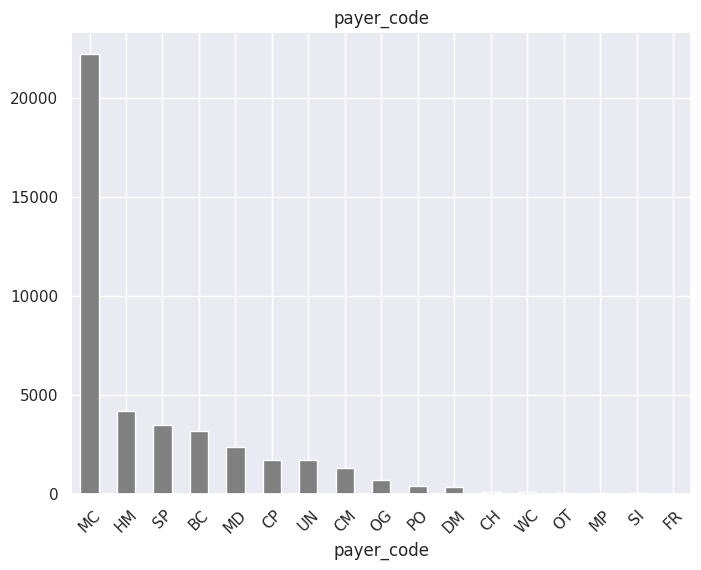

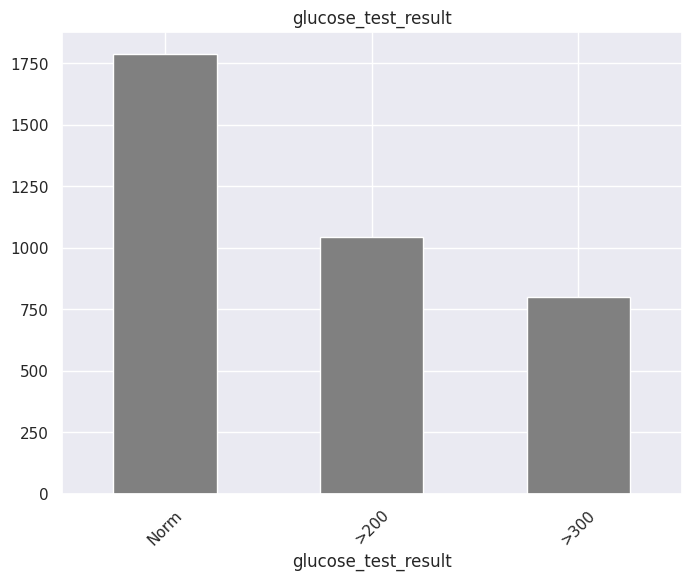

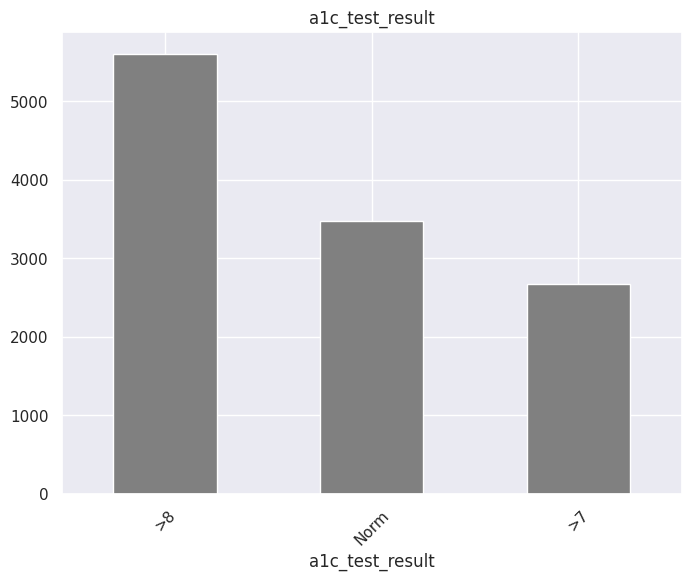

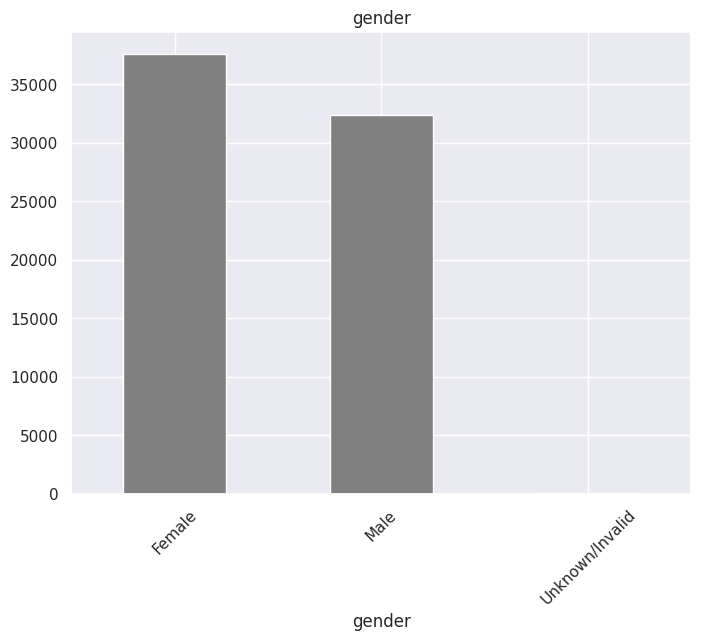

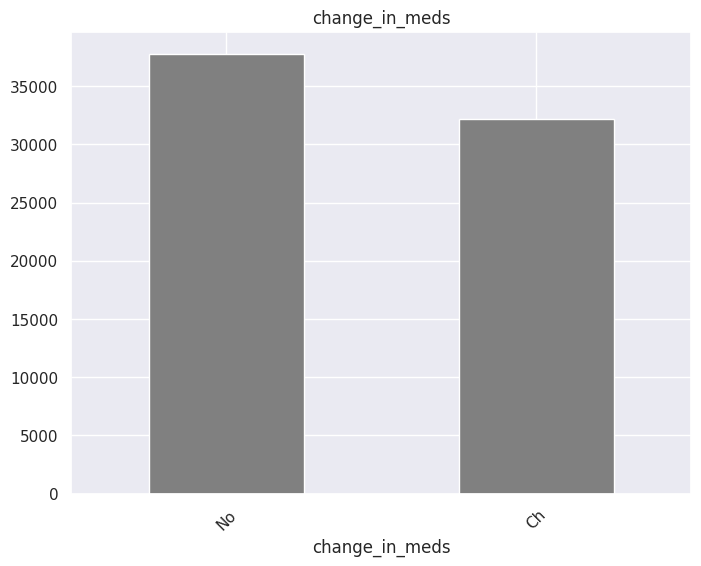

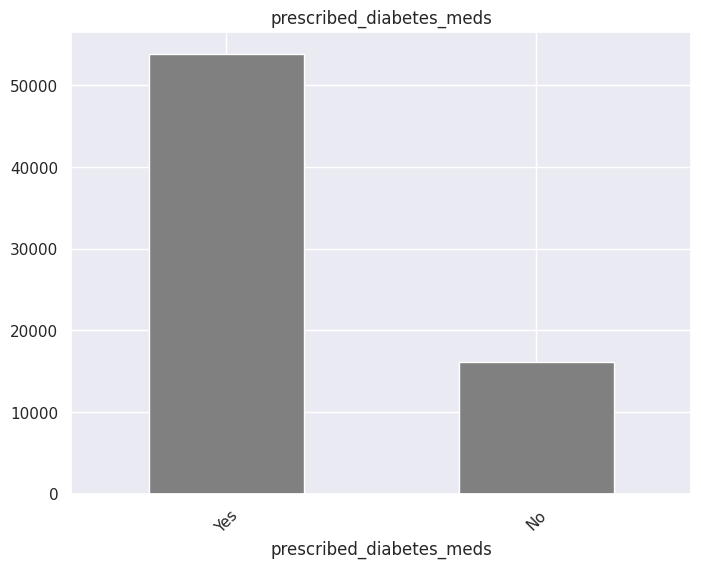

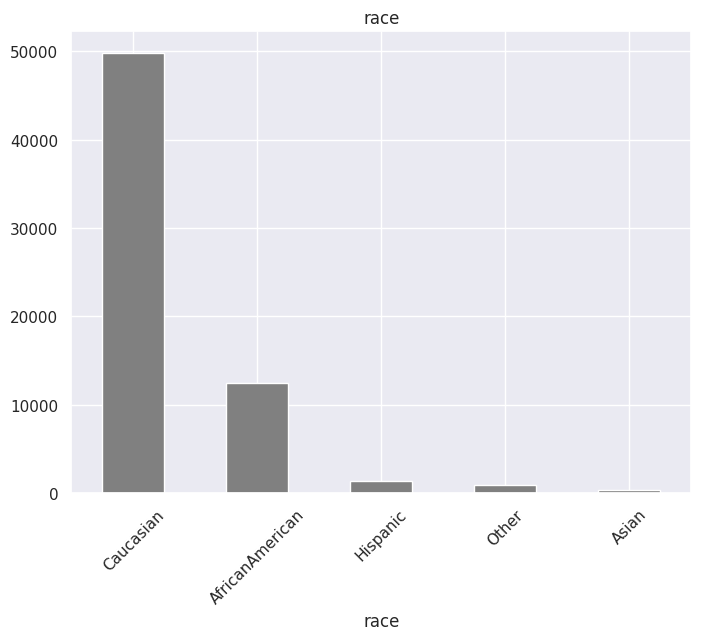

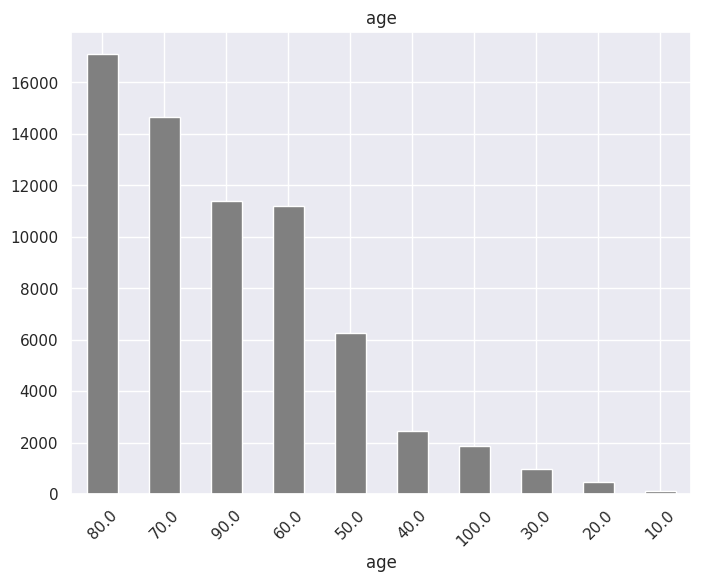

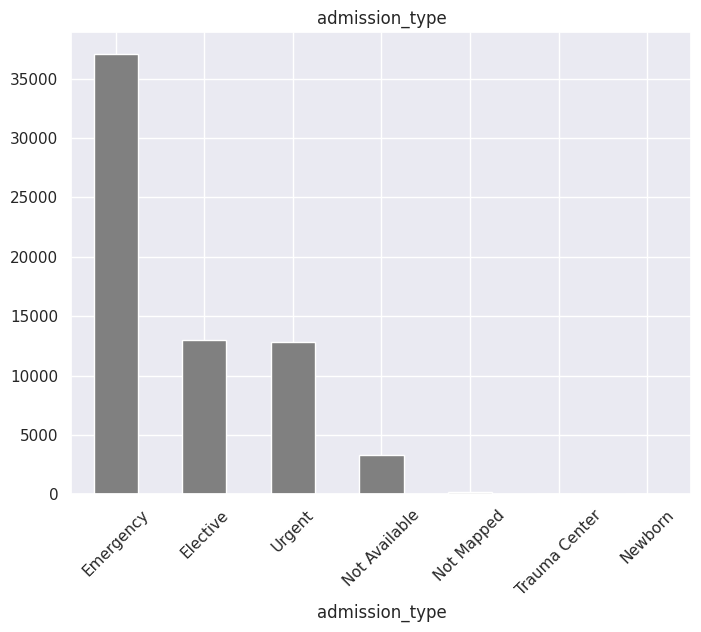

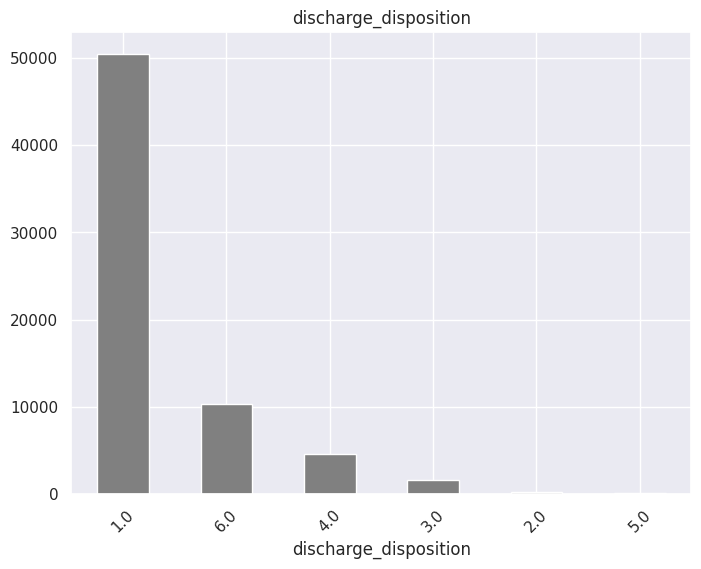

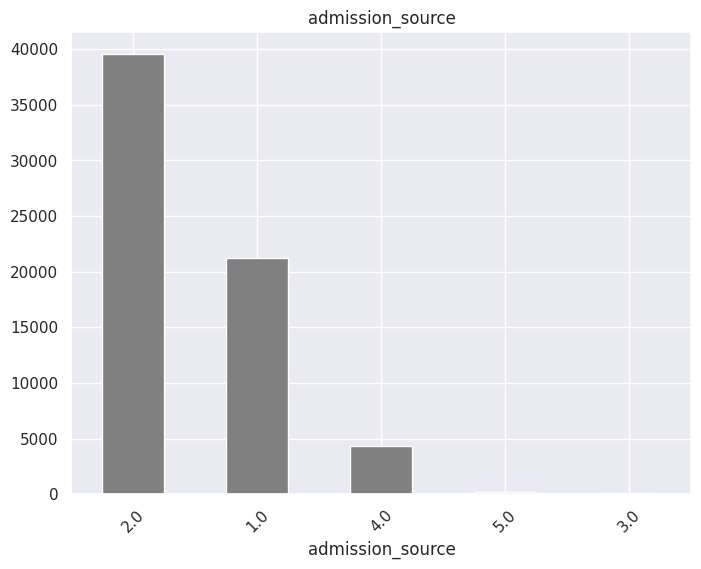

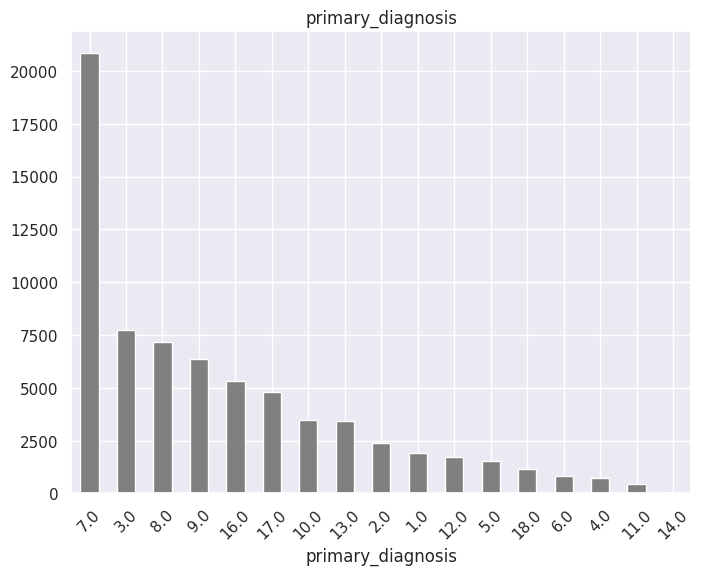

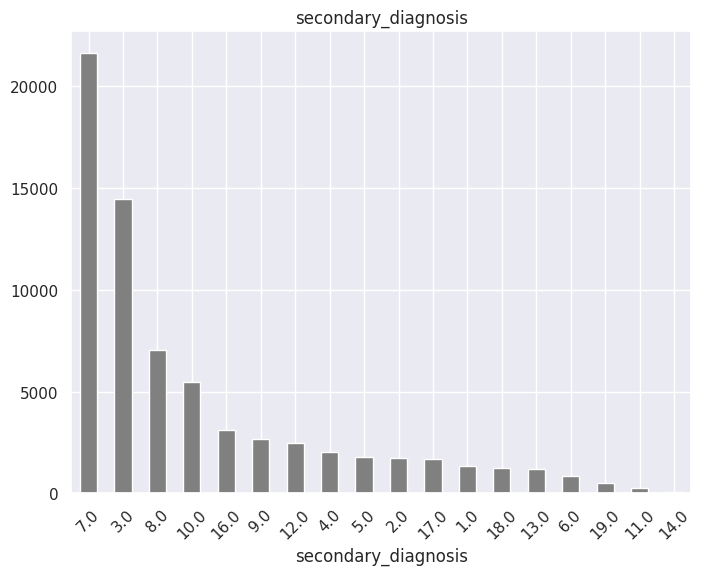

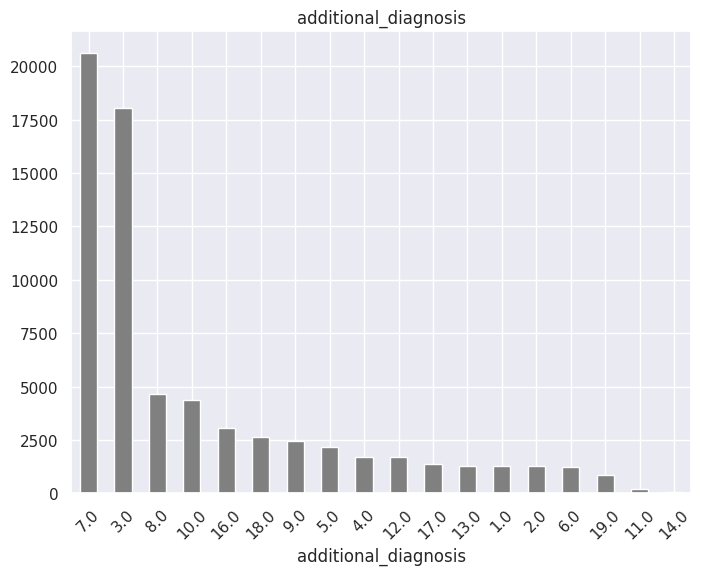

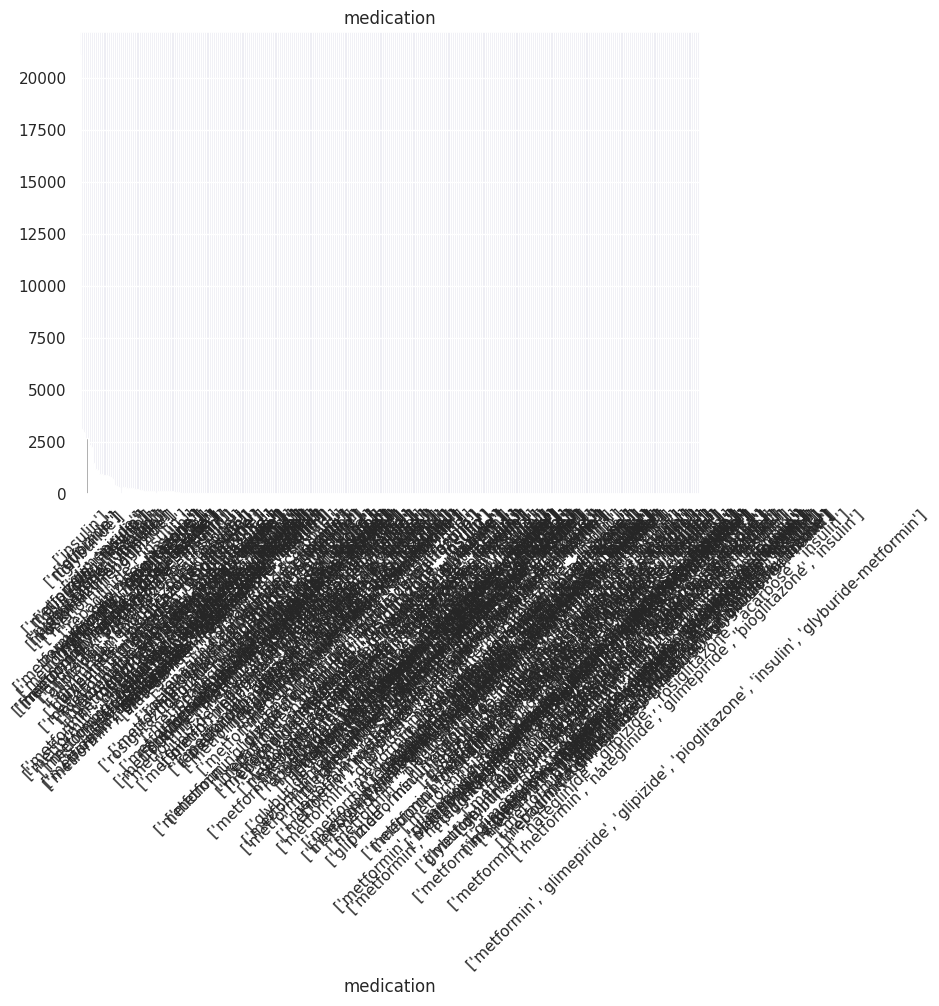

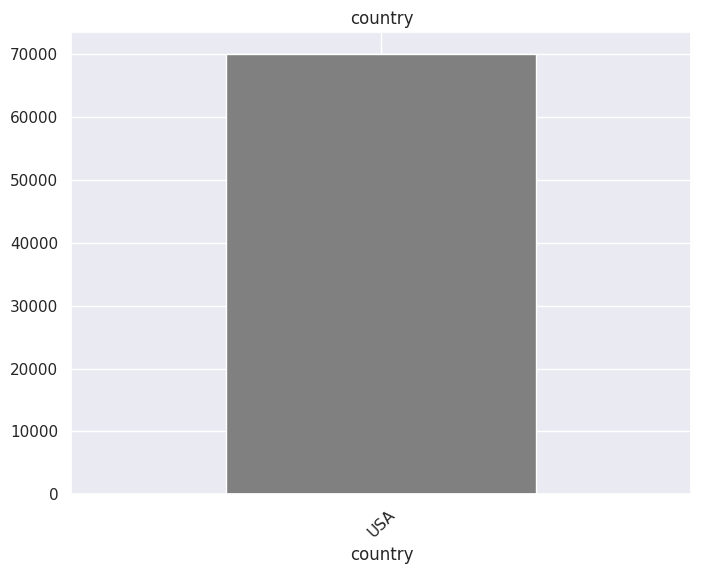

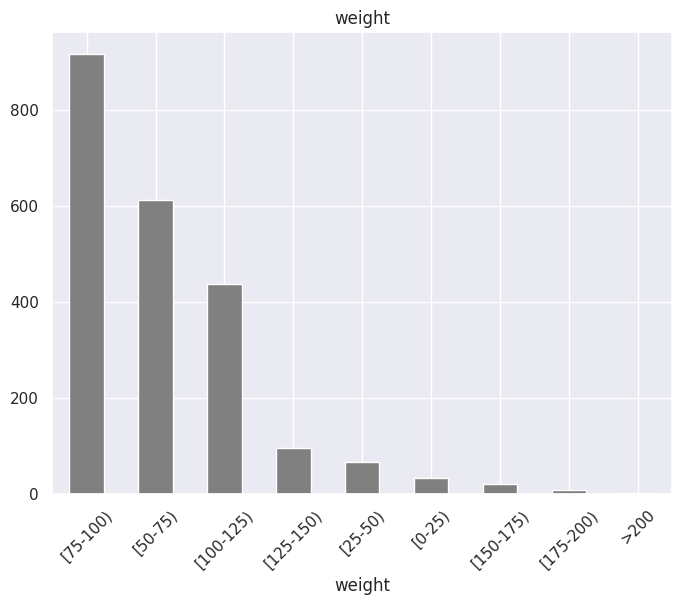

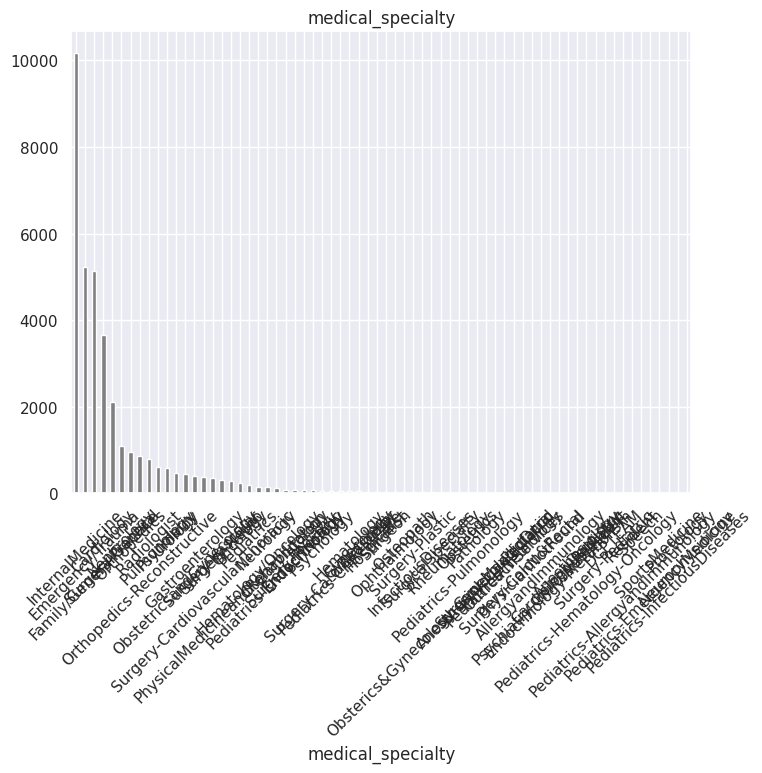

In [ ]:
# Loop through each binary variable and create a separate bar plot
for feature in non_metric_feats:
    plt.figure(figsize=(8, 6))
    variable_counts = data[feature].value_counts()
    variable_counts.plot(kind='bar', color='gray')
    plt.title(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

# **Missing Values**

In [ ]:
data.isna().sum()

,0
country,0
patient_id,0
race,4998
gender,0
age,3491
weight,67782
payer_code,27875
outpatient_visits,0
emergency_visits,0
inpatient_visits,0


In [ ]:
# % of missing values
round((data.isna().sum())/len(data)*100, 2).sort_values(ascending=False)

,0
weight,96.87
glucose_test_result,94.81
a1c_test_result,83.22
medical_specialty,48.97
payer_code,39.84
medication,23.03
race,7.14
admission_source,6.66
admission_type,5.21
age,4.99


# **Working on the results for Missing Values**

In [ ]:
# Drop weight since it has too many missing values
# Country has no missing values, but they're all the same, so don't add info to the model
# medical_specialty has 50% of missing values and imputing this values would cause bias to the models
data.drop(columns=['weight', 'country','medical_specialty', 'readmitted_multiclass'], inplace=True)

#remove this from non_metric_feats
non_metric_feats.remove('weight')
non_metric_feats.remove('country')
non_metric_feats.remove('medical_specialty')

In [ ]:
# Let's assume missing values on glucose_test_result and a1c_test_result to be from people that didn't do the glucose exam
data['glucose_test_result'].fillna('None', inplace= True)
data['a1c_test_result'].fillna('None', inplace= True)

# Assume missing values on payer_code to be from people that don't have insurance
data['payer_code'].fillna('None', inplace= True)

# Let's assume missing values on medication to be from people that don't take any meds
data['medication'].fillna('No_meds', inplace= True)

In [ ]:
# Through the feature 'number_diagnosis', some of the missing values on secondary_diagnosis and additional_diagnosis are actually empty values
# Example: if number_diagnosis=1, the patient only has 1 primary diagnosis

data['secondary_diagnosis'] = data['secondary_diagnosis'].fillna(data['number_diagnoses'].map({1:0}))

data['additional_diagnosis'] = data['additional_diagnosis'].fillna(data['number_diagnoses'].map({1:0, 2:0}))

In [ ]:
data.isna().sum()

,0
patient_id,0
race,4998
gender,0
age,3491
payer_code,0
outpatient_visits,0
emergency_visits,0
inpatient_visits,0
admission_type,3644
discharge_disposition,2589


# **Imputation of missing values**

In [ ]:
data_central = data.copy()

# Assuming non_metric_feats contains the names of your non-metric features
modes = data_central[non_metric_feats].mode().loc[0]

# Concatenate the modes into a DataFrame
missing_values = pd.DataFrame(modes, columns=['Mode'])

data_central.fillna(modes, inplace=True)

# Display the DataFrame after imputation
data = data_central.copy()

In [ ]:
data.isna().sum()

,0
patient_id,0
race,0
gender,0
age,0
payer_code,0
outpatient_visits,0
emergency_visits,0
inpatient_visits,0
admission_type,0
discharge_disposition,0


# **Feature Engineering**

In [ ]:
# Create column with recurrency of patients
data['recurrency'] = data['patient_id'].duplicated(keep=False).astype(int)

In [ ]:
# Patient Severity: Sum the number of diagnoses, lab tests, and non-lab procedures to create a composite severity score for each patient.
# Create a new column for the composite severity score
data['patient_severity_score'] = data['number_diagnoses'] + data['number_lab_tests'] + data['non_lab_procedures']

In [ ]:
# Define a function to calculate the ratio of changes in medication to the total number of medications
def calculate_medication_change_ratio(row):
    total_medications = row['number_of_medications']
    medication_changes = row['change_in_meds']

    # Check if there is a change in medication
    if medication_changes == 'Ch':
        return 1.0 * total_medications  # You can adjust this multiplier based on your preference
    else:
        return 0.0

# Apply the function to create the new feature
data['medication_change_ratio'] = data.apply(calculate_medication_change_ratio, axis=1)

In [ ]:
#Number of Prior Visits: Count the number of visits each patient has had before the current encounter.

# Reset the index to make 'encounter_id' a regular column
data = data.reset_index()

# Create column to count the number of visits each patient had before the current encounter
data['number_prior_visits'] = data.groupby('patient_id')['encounter_id'].transform('cumcount')

In [ ]:
# Create a new column for the ratio of lab tests to medications
data['lab_tests_to_medications_ratio'] = data['number_lab_tests'] / data['number_of_medications']

In [ ]:
'''
Age times medications:
create a new feature representing the product of age and the number of medications,
to capture a combined effect of a patient's age and the number of medications they are taking
'''
# Create a new age-related interaction feature
data['age_times_medications'] = data['age'] * data['number_of_medications']

In [ ]:
data.dtypes

,0
encounter_id,int64
patient_id,int64
race,object
gender,object
age,float64
payer_code,object
outpatient_visits,float64
emergency_visits,float64
inpatient_visits,float64
admission_type,object


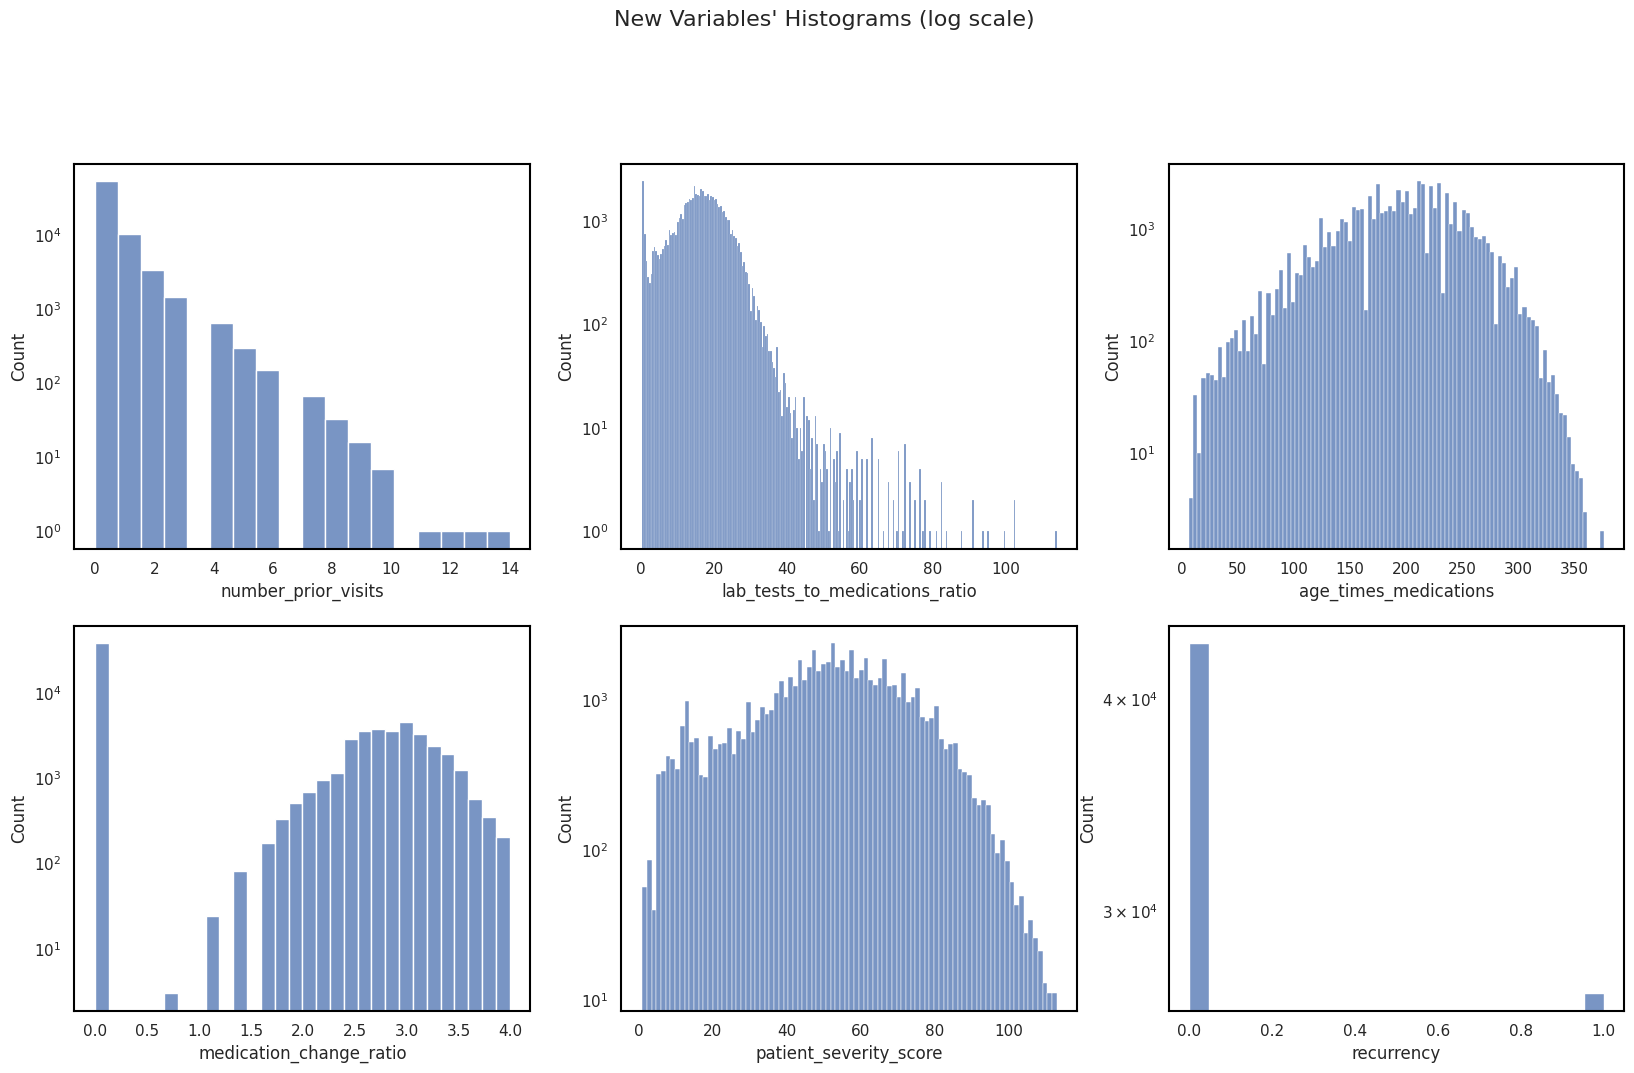

In [ ]:
new_feats = ['number_prior_visits','lab_tests_to_medications_ratio', 'age_times_medications','medication_change_ratio',
'patient_severity_score','recurrency']


sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(new_feats) / 2), figsize=(20, 11))
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor('white') # White background
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Frame color
            spine.set_linewidth(1.5)
# Plot data
for ax, feat in zip(axes.flatten(), new_feats):
    sns.histplot(data=data, x=data[feat], ax=ax)
    ax.set_yscale("log")  # Set a logarithmic scale for the y-axis

# Layout
# Add a centered title to the figure
fig.suptitle("New Variables' Histograms (log scale)", fontsize=16, y=1.02)

plt.show()

In [ ]:
#in the variables that have the distributions right skewed
feats_to_log_2 = ['number_prior_visits', 'lab_tests_to_medications_ratio']
# Log transformation of metric features
data[feats_to_log_2] = np.log1p(data[feats_to_log_2])

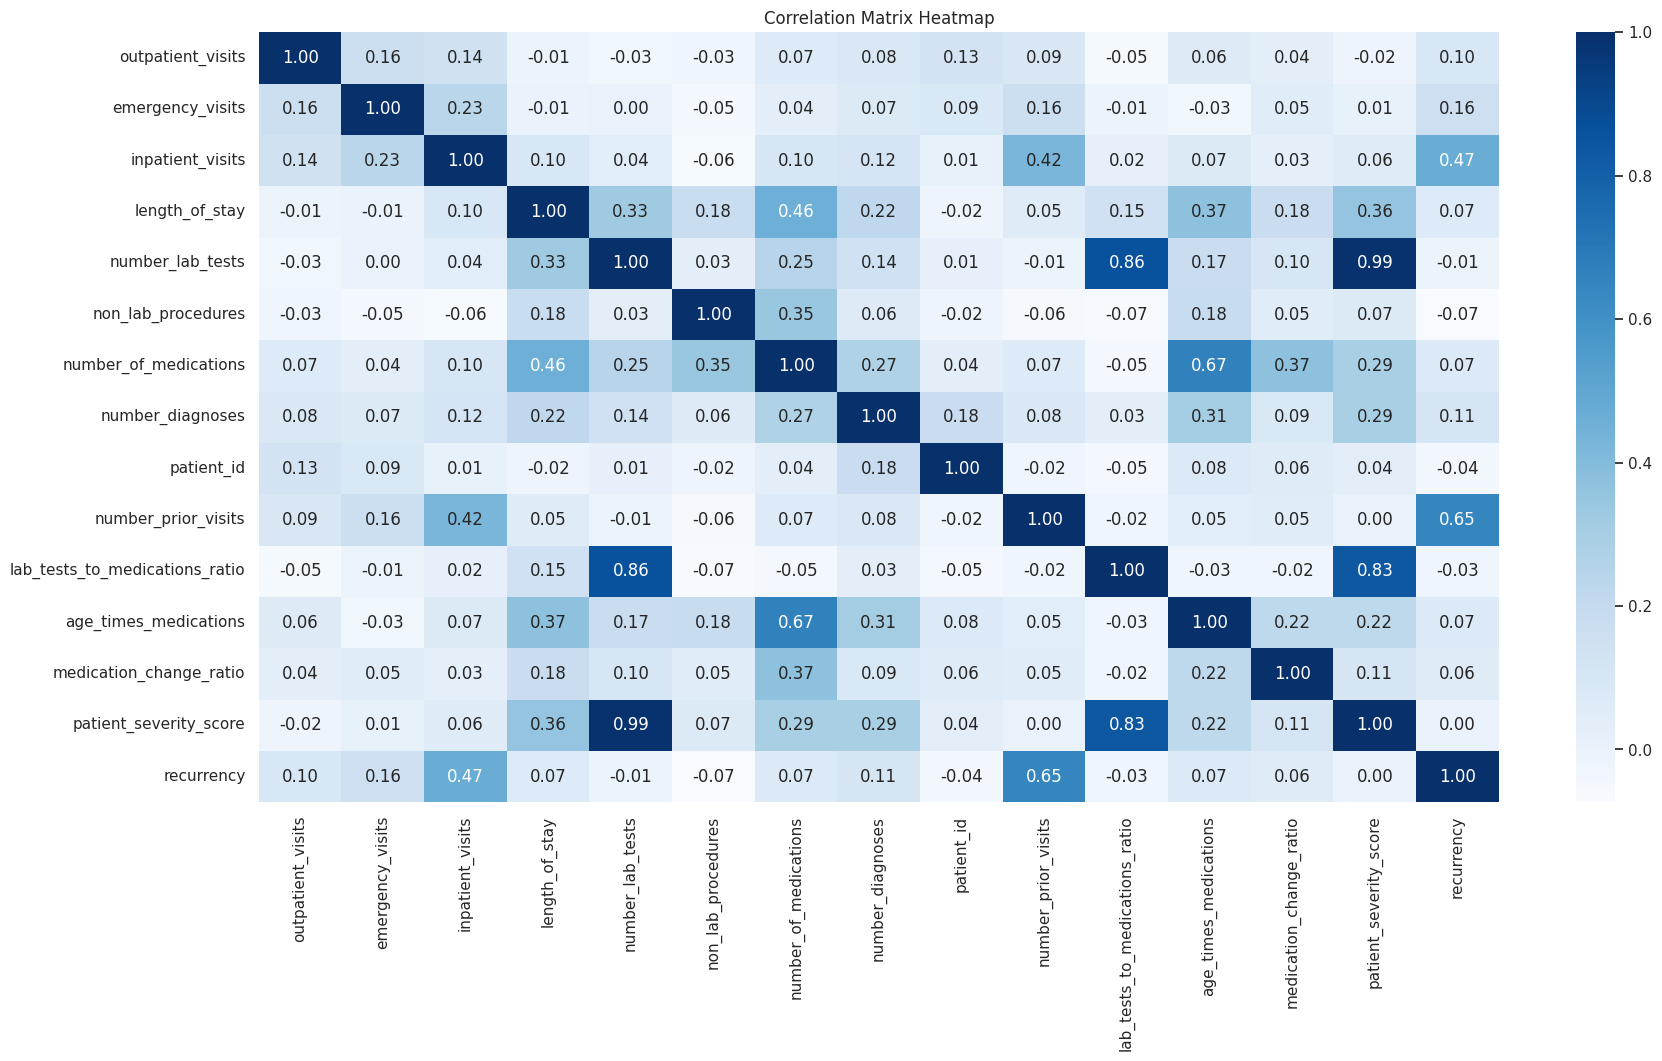

In [ ]:
# Correlation Matrix
correlation_matrix = data[metric_feats+new_feats].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# **Encoding categorical variables**

In [ ]:
v_to_encode = ['payer_code','glucose_test_result', 'a1c_test_result', 'gender', 'change_in_meds', 'prescribed_diabetes_meds', 'race', 'admission_type', 'medication']

# label_encoder
label_encoder = LabelEncoder()

for column in v_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.set_index('encounter_id', inplace=True)

# **Feature Selection**

In [ ]:
target_column = 'readmitted_binary'

X_cat = data[non_metric_feats]
y = data[target_column]

X_train_cat, X_val_cat, y_train, y_val = train_test_split(X_cat, y, test_size=0.2, random_state=42)

def TestIndependence(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index=dfObserved.index)

    if p < alpha:
        result = f"{var} is IMPORTANT for Prediction"
    else:
        result = f"{var} is NOT an important predictor. (Discard {var} from model)"

    print(result)

for var in X_train_cat.columns:
    TestIndependence(X_train_cat[var], y_train, var)

payer_code is IMPORTANT for Prediction
glucose_test_result is NOT an important predictor. (Discard glucose_test_result from model)
a1c_test_result is IMPORTANT for Prediction
gender is NOT an important predictor. (Discard gender from model)
change_in_meds is IMPORTANT for Prediction
prescribed_diabetes_meds is IMPORTANT for Prediction
race is NOT an important predictor. (Discard race from model)
age is IMPORTANT for Prediction
admission_type is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is IMPORTANT for Prediction
primary_diagnosis is IMPORTANT for Prediction
secondary_diagnosis is IMPORTANT for Prediction
additional_diagnosis is IMPORTANT for Prediction
medication is IMPORTANT for Prediction


In [ ]:
# preserve dataframe without scale
df = data.copy()

In [ ]:
# with the log trnasformations we have normal distributions we can use standard scaler since we don´t have skewed distributions
feats_to_scale = data.columns.drop('readmitted_binary').to_list()
scaler = RobustScaler()
data[feats_to_scale] =  scaler.fit_transform(data[feats_to_scale])

In [ ]:
feats_to_test = ['race', 'gender', 'age', 'payer_code',
       'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'admission_type', 'discharge_disposition', 'admission_source',
       'length_of_stay', 'number_lab_tests', 'non_lab_procedures',
       'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis',
       'additional_diagnosis', 'number_diagnoses', 'glucose_test_result',
       'a1c_test_result', 'change_in_meds', 'prescribed_diabetes_meds',
       'medication', 'recurrency', 'patient_severity_score',
       'medication_change_ratio', 'number_prior_visits',
       'lab_tests_to_medications_ratio', 'age_times_medications']

In [ ]:
X = data[feats_to_test]  # Features
y = data['readmitted_binary']  # Target variable

# **Mutual Information**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Calculate mutual information scores for each feature
mi_scores = mutual_info_classif(X_train, y_train)

# Create a list of tuples containing feature names and their scores
feature_scores = list(zip(X_train.columns, mi_scores))

# Print the feature importance scores in descending order
print("Mutual Information Scores (Descending Order):")
for feature, score in sorted(feature_scores, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score}")

# Use cross-validation to get a more robust estimate of the model's performance
classifier = RandomForestClassifier()  # Replace with your desired classifier
cv_scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Mutual Information Scores (Descending Order):
recurrency: 0.028655937294380207
number_prior_visits: 0.014775503069417883
inpatient_visits: 0.008405544081224736
gender: 0.00633057148937799
change_in_meds: 0.005990399888016196
discharge_disposition: 0.004762335894294978
non_lab_procedures: 0.003490673664023003
medication: 0.003038596177997732
additional_diagnosis: 0.002899076959446134
length_of_stay: 0.002882863969003946
primary_diagnosis: 0.002628778525855191
age_times_medications: 0.0025009921963676796
number_diagnoses: 0.002394969596518859
prescribed_diabetes_meds: 0.0022182421558587517
lab_tests_to_medications_ratio: 0.002116867738474415
admission_type: 0.001947348593710485
number_of_medications: 0.0019253349086865157
payer_code: 0.0014112384802029698
glucose_test_result: 0.0011854891083673547
secondary_diagnosis: 0.001129785251780424
age: 0.0010743365626249002
outpatient_visits: 0.0010063857589841518
admission_source: 0.0008286520436266986
medication_change_ratio: 0.0007384127463128

# **Boruta**

In [ ]:
X = X.values
y = y.values

# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Initialize Boruta
boruta_selector = BorutaPy(rf_classifier, n_estimators='auto', verbose=2, random_state=42)

# Fit Boruta on the data
boruta_selector.fit(X, y)

# Zip names, ranks, and decisions into a single iterable
feature_ranks = list(zip(feats_to_test,
                         boruta_selector.ranking_,
                         boruta_selector.support_))

# Sort by ranking
feature_ranks_sorted = sorted(feature_ranks, key=lambda x: x[1])

# Iterate through and print out the results
for feat in feature_ranks_sorted:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))


Cross-Validation Scores:
[0.89073889 0.89102472 0.89081035 0.89116764 0.89094547]
Mean CV Score: 0.8909374152561489
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	29
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	2
Rejected: 	27
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	27
Iteration:

In [ ]:
X = data[feats_to_test]  # Features
y = data['readmitted_binary']  # Target variable

# **Ridge Regression**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert target values to numeric
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_val = y_val.replace({'Yes': 1, 'No': 0})

alpha_values = [0.1, 1, 10, 100]
parameters = {'alpha': alpha_values}

ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
final_ridge_model = Ridge(alpha=best_alpha)
final_ridge_model.fit(X_train, y_train)

coefficients = final_ridge_model.coef_

y_pred = final_ridge_model.predict(X_val)

coefficients

# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(feats_to_test, coefficients))

# Sort the feature ranks by coefficients in descending order
sorted_feature_ranks = sorted(feature_ranks, key=lambda x: abs(x[1]), reverse=True)

# iterate through and print out the results
for feat in feature_ranks:
    print('Feature: {:<25} Coef: {}'.format(feat[0], feat[1]))

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(final_ridge_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  # Adjust cv and scoring as needed

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

Feature: race                      Coef: 0.002598689317629164
Feature: gender                    Coef: 0.002130342297975127
Feature: age                       Coef: -0.0004711443306059838
Feature: payer_code                Coef: 0.003242561176435856
Feature: outpatient_visits         Coef: 0.000998844140094416
Feature: emergency_visits          Coef: 0.014680483045122431
Feature: inpatient_visits          Coef: 0.011955478997816349
Feature: admission_type            Coef: -5.519397833648439e-05
Feature: discharge_disposition     Coef: 0.008845728865678476
Feature: admission_source          Coef: -0.00021835603806197
Feature: length_of_stay            Coef: 0.0032942366618407383
Feature: number_lab_tests          Coef: 0.000545147628568799
Feature: non_lab_procedures        Coef: 0.00270921858184283
Feature: number_of_medications     Coef: 0.0022584889415681376
Feature: primary_diagnosis         Coef: -0.0013508473095304172
Feature: secondary_diagnosis       Coef: -0.0006116138149541045

In [ ]:
# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Initialize RFE with the Random Forest model and the number of features to select
rfe = RFE(estimator=rf_classifier)

# Perform cross-validation to get a more robust estimate of the model's performance
cv_scores = cross_val_score(rfe, X, y, cv=5, scoring='accuracy')

print("\nCross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Fit RFE to the data
rfe.fit(X, y)

# Create a DataFrame with features, ranking, and support
feature_ranks_df = pd.DataFrame({'Feature': feats_to_test,
                                  'Ranking': rfe.ranking_,
                                  'Support': rfe.support_})

# Sort the DataFrame by ranking
sorted_feature_ranks_df = feature_ranks_df.sort_values(by='Ranking')

# Print the selected features and their ranking
print("\nSelected Features with Ranking:")
print(sorted_feature_ranks_df[['Feature', 'Ranking']])

KeyboardInterrupt: 

# **Select K Best**

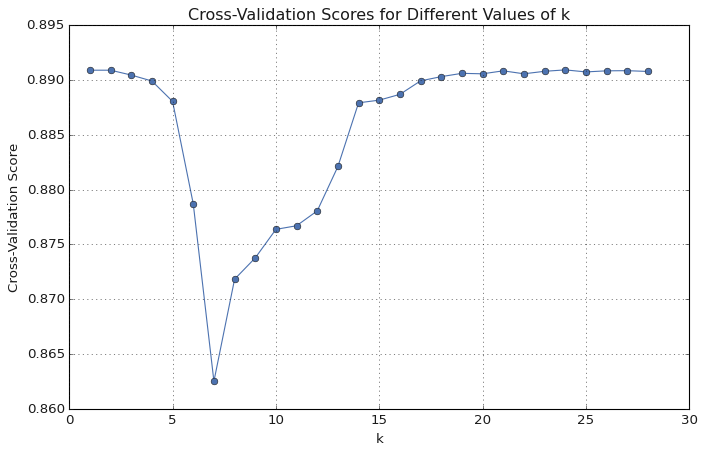

Best k: 24
Best Score: 0.8909088295347167
Selected Features: Index(['gender', 'age', 'payer_code', 'outpatient_visits', 'emergency_visits',
       'inpatient_visits', 'discharge_disposition', 'length_of_stay',
       'number_lab_tests', 'non_lab_procedures', 'number_of_medications',
       'primary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'a1c_test_result', 'change_in_meds', 'prescribed_diabetes_meds',
       'medication', 'recurrency', 'patient_severity_score',
       'medication_change_ratio', 'number_prior_visits',
       'lab_tests_to_medications_ratio', 'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.89081035 0.89102472 0.89116764 0.89073889 0.89080254]
Mean Accuracy: 0.8909088295347167


In [ ]:
# Create a pipeline with SelectKBest and a classifier
def create_pipeline(k):
    if k == 'all':
        return make_pipeline(SelectKBest(f_classif, k=k), RandomForestClassifier(random_state=42))
    else:
        return make_pipeline(SelectKBest(f_classif, k=min(k, X.shape[1])), RandomForestClassifier(random_state=42))

# Choose a range of k values to try
k_values = [i for i in range(1, min(X.shape[1], 29))]  # Adjusted the range

# Perform cross-validation for each k
cv_scores = []
for k in k_values:
    pipeline = create_pipeline(k)
    scores = cross_val_score(pipeline, X, y, cv=5)  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Plot the scores for different k values
plt.style.use('classic')
fig = plt.figure(figsize=(10, 6), facecolor='white')
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Scores for Different Values of k')
plt.xlabel('k')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
plt.show()

# Find the k that results in the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
best_score = np.max(cv_scores)
print("Best k:", best_k)
print("Best Score:", best_score)

# Create the final pipeline with the best k
final_pipeline = create_pipeline(best_k)

# Fit the final pipeline on the entire dataset
final_pipeline.fit(X, y)

# Get the selected features
k_best = final_pipeline.named_steps['selectkbest']
selected_features = X.columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Use a classifier (e.g., RandomForest) with the selected features

# Define the classifier
clf = final_pipeline.named_steps['randomforestclassifier']

# Perform cross-validation on the entire dataset
cv_scores = cross_val_score(final_pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed
cv_scores_binary = cv_scores
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

In [ ]:
# k = 14
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top k features using SelectKBest
k_best = SelectKBest(f_classif, k=14)  # Adjust k based on your needs

X_train_kbest = k_best.fit_transform(X_train, y_train)
X_val_kbest = k_best.transform(X_val)

# Get the selected features
selected_features = X.columns[k_best.get_support()]

# Display the selected features
print("Selected Features:", selected_features)

# Use a classifier (e.g., RandomForest) with the selected features

# Define the classifier
clf = RandomForestClassifier(random_state=42)

# Combine feature selection and classification into a pipeline
pipeline = Pipeline([('feature_selection', k_best), ('classification', clf)])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)  # You can adjust the number of folds (cv parameter) as needed

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

Selected Features: Index(['age', 'outpatient_visits', 'emergency_visits', 'inpatient_visits',
       'discharge_disposition', 'length_of_stay', 'number_of_medications',
       'number_diagnoses', 'prescribed_diabetes_meds', 'recurrency',
       'patient_severity_score', 'medication_change_ratio',
       'number_prior_visits', 'age_times_medications'],
      dtype='object')
Cross-Validation Scores: [0.88838073 0.8877376  0.88866657 0.88752322 0.88722933]
Mean Accuracy: 0.887907492201357


# **Random Forest**

                           Feature  Importance
23                      recurrency    0.176690
26             number_prior_visits    0.081239
27  lab_tests_to_medications_ratio    0.065419
6                 inpatient_visits    0.063823
28           age_times_medications    0.060775
24          patient_severity_score    0.060601
11                number_lab_tests    0.048768
13           number_of_medications    0.043447
8            discharge_disposition    0.041843
22                      medication    0.036165
14               primary_diagnosis    0.034117
10                  length_of_stay    0.033613
16            additional_diagnosis    0.030907
15             secondary_diagnosis    0.030188
25         medication_change_ratio    0.027370
3                       payer_code    0.025702
17                number_diagnoses    0.023228
12              non_lab_procedures    0.021591
2                              age    0.021569
7                   admission_type    0.013177
1            

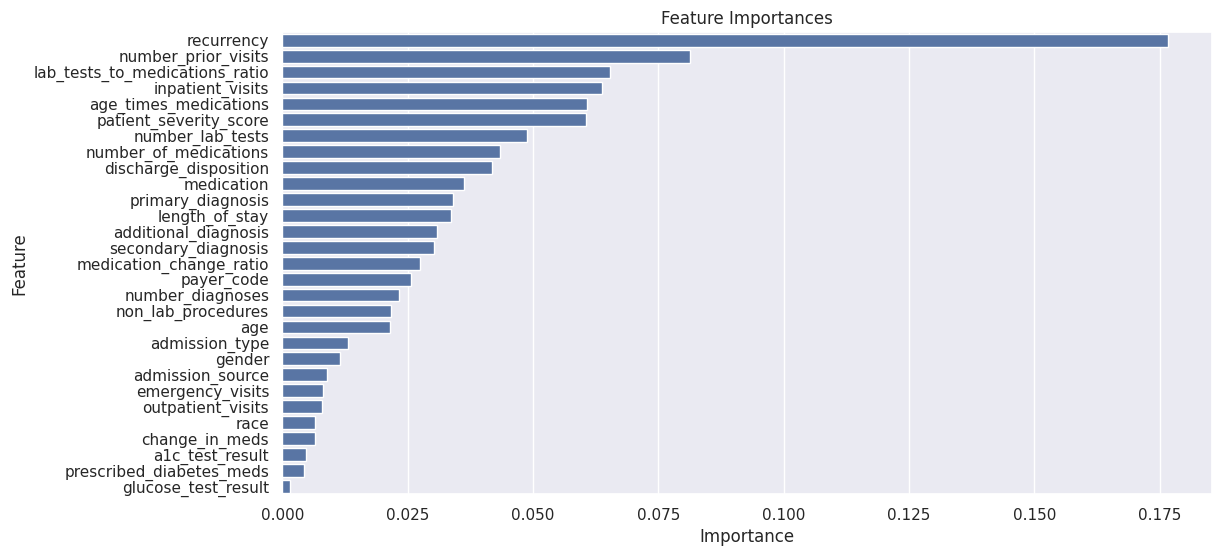

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)


clf = RandomForestClassifier(n_estimators= 200, criterion= 'entropy', max_depth=100, min_samples_leaf = 20, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances_rf = clf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_rf)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importances')
plt.show()

# **Lasso Regression**

Cross-Validation Scores: [-0.09262145 -0.08712659 -0.09223238 -0.09527731 -0.09085082 -0.09024601
 -0.098319   -0.08905617 -0.094131   -0.08603114]
Mean Negative MSE: -0.09158918632409092
Lasso picked 22 variables and eliminated the other 7 variables
secondary_diagnosis              -0.002843
primary_diagnosis                -0.001271
age                               0.000000
outpatient_visits                 0.000000
number_lab_tests                  0.000000
admission_source                  0.000000
number_diagnoses                  0.000000
additional_diagnosis             -0.000000
medication_change_ratio          -0.000000
medication                        0.000253
admission_type                    0.000345
glucose_test_result               0.000976
lab_tests_to_medications_ratio    0.001498
number_of_medications             0.002121
patient_severity_score            0.002428
gender                            0.002472
length_of_stay                    0.002627
race              

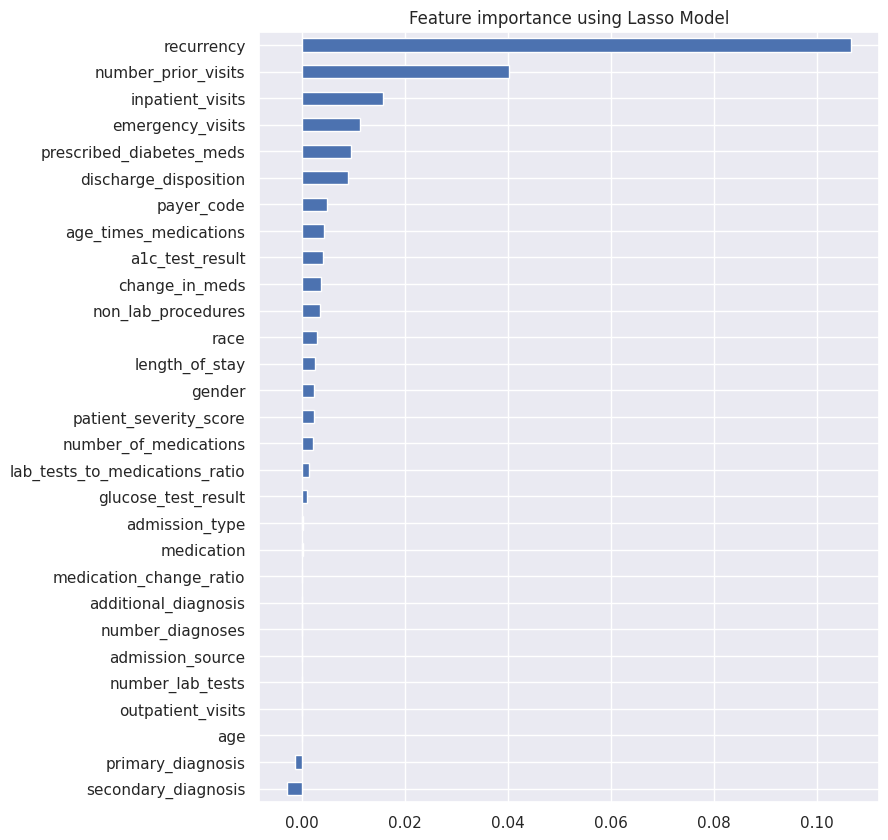

In [ ]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

# Convert target values to numeric
y_train = y_train.replace({'Yes': 1, 'No': 0})
y_val = y_val.replace({'Yes': 1, 'No': 0})

# Fitting LassoCV model
reg = LassoCV()

# Perform cross-validation
cv_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Negative MSE:", cv_scores.mean())

# Fit the LassoCV model on the entire training set
reg.fit(X_train, y_train)

# Extracting feature importances
coef = pd.Series(reg.coef_, index=X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " + str(sum(coef == 0)) + " variables")
print(coef.sort_values())

# Plot
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8, 10))
    imp_coef.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

plot_importance(coef, 'Lasso')

# **Model Testing**

In [ ]:
feats_to_model = ['length_of_stay', 'discharge_disposition', 'inpatient_visits', 'number_prior_visits', 'recurrency',
                  'patient_severity_score', 'age_times_medications']

X_selected = df[feats_to_model]
y = df['readmitted_binary']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y,test_size=0.2, random_state = 42, stratify=y)

In [ ]:
# Create an instance of RandomUnderSampler
ros = RandomUnderSampler(random_state=42)

# Fit and transform the training data using the sampler
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
def model_report(y_true, y_pred, model_name):

    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, pos_label='Yes')

    print("{} Accuracy: {:.2f}%".format(model_name, accuracy * 100))
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    print("f1 Score ", f1)

# **Random Forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, criterion= 'entropy', max_depth=50, min_samples_leaf = 20, random_state=42)
rf_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

model_report(y_test, y_pred, 'Random Forest')

print('Train score: ', rf_model.score(X_ros, y_ros))
print('Test score: ', rf_model.score(X_test, y_test))

Random Forest Accuracy: 63.83%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.19      0.74      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Confusion Matrix:
 [[7808 4659]
 [ 402 1125]]
f1 Score  0.30775543701272057
Train score:  0.7115258677144728
Test score:  0.6383450050021438


# **Ada Boost**

In [ ]:
# Create and train an AdaBoost model
ada_model = AdaBoostClassifier(algorithm='SAMME', learning_rate = 0.2, n_estimators=200, random_state=42)
ada_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = ada_model.predict(X_test)

model_report(y_test, y_pred, 'AdaBoost Undersampler')

print('Train score: ', ada_model.score(X_ros, y_ros))
print('Test score: ', ada_model.score(X_test, y_test))

AdaBoost Undersampler Accuracy: 65.84%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8156 4311]
 [ 469 1058]]
f1 Score  0.3068445475638051
Train score:  0.6743614931237721
Test score:  0.6584250393025582


# **Decision Tree**

In [ ]:
# Create and train a DecisionTree
dt_model = DecisionTreeClassifier(max_depth=100, min_samples_leaf=20, criterion='entropy', max_features= 0.6, splitter='random', min_impurity_decrease= 0.09, random_state=42)
dt_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

model_report(y_test, y_pred, 'Decision tree')

print('Train score: ', dt_model.score(X_ros, y_ros))
print('Test score: ', dt_model.score(X_test, y_test))

Decision tree Accuracy: 89.09%
Classification Report:
               precision    recall  f1-score   support

          No       0.89      1.00      0.94     12467
         Yes       0.00      0.00      0.00      1527

    accuracy                           0.89     13994
   macro avg       0.45      0.50      0.47     13994
weighted avg       0.79      0.89      0.84     13994

Confusion Matrix:
 [[12467     0]
 [ 1527     0]]
f1 Score  0.0
Train score:  0.5
Test score:  0.890881806488495


# **Neural Network**

In [ ]:
nn_model = MLPClassifier(max_iter=150, activation='relu' , hidden_layer_sizes=[150,150], random_state=42)
nn_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = nn_model.predict(X_test)

model_report(y_test, y_pred, 'Neural network')

print('Train score: ', nn_model.score(X_ros, y_ros))
print('Test score: ', nn_model.score(X_test, y_test))

Neural network Accuracy: 72.65%
Classification Report:
               precision    recall  f1-score   support

          No       0.93      0.75      0.83     12467
         Yes       0.21      0.52      0.30      1527

    accuracy                           0.73     13994
   macro avg       0.57      0.64      0.56     13994
weighted avg       0.85      0.73      0.77     13994

Confusion Matrix:
 [[9365 3102]
 [ 726  801]]
f1 Score  0.2950276243093923
Train score:  0.6367878192534381
Test score:  0.7264541946548521


# **Extra Trees**

In [ ]:
# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=50, criterion='entropy', min_samples_leaf=20, random_state=42)
et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test)

model_report(y_test, y_pred, 'Extra Trees Oversampler')

print('Train score: ', et_model.score(X_ros, y_ros))
print('Test score: ', et_model.score(X_test, y_test))

Extra Trees Oversampler Accuracy: 64.22%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.20      0.73      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Confusion Matrix:
 [[7865 4602]
 [ 405 1122]]
f1 Score  0.3094745552337609
Train score:  0.6863948919449901
Test score:  0.6422038016292697


In [ ]:
# Create and train a DecisionTree
et_model = ExtraTreesClassifier(n_estimators=200, max_depth=50, criterion='entropy', min_samples_leaf=20, random_state=42)
et_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = et_model.predict(X_test)

model_report(y_test, y_pred, 'Extra Trees Oversampler')

print('Train score: ', et_model.score(X_ros, y_ros))
print('Test score: ', et_model.score(X_test, y_test))

Extra Trees Oversampler Accuracy: 64.20%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.63      0.76     12467
         Yes       0.20      0.73      0.31      1527

    accuracy                           0.64     13994
   macro avg       0.57      0.68      0.53     13994
weighted avg       0.87      0.64      0.71     13994

Confusion Matrix:
 [[7863 4604]
 [ 406 1121]]
f1 Score  0.3091560948703806
Train score:  0.6868041912246234
Test score:  0.6419894240388738


# **Logistic Regression**

In [ ]:
# Create and train lr
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

model_report(y_test, y_pred, 'Logistic Regression')

print('Train score: ', lr_model.score(X_ros, y_ros))
print('Test score: ', lr_model.score(X_test, y_test))

Logistic Regression Accuracy: 65.74%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.69      0.31      1527

    accuracy                           0.66     13994
   macro avg       0.57      0.67      0.54     13994
weighted avg       0.86      0.66      0.72     13994

Confusion Matrix:
 [[8139 4328]
 [ 466 1061]]
f1 Score  0.30682475419317523
Train score:  0.6754256712508186
Test score:  0.6574246105473774


# **Hist Gradient Boosting**

In [ ]:
hgb_model = HistGradientBoostingClassifier(max_iter= 200, max_depth=30, min_samples_leaf = 30, learning_rate=0.005, random_state=42)
hgb_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = hgb_model.predict(X_test)

model_report(y_test, y_pred, 'Hist Gradient Boosting undersampler')

print('Train score: ', hgb_model.score(X_ros, y_ros))
print('Test score: ', hgb_model.score(X_test, y_test))

Hist Gradient Boosting undersampler Accuracy: 65.85%
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.65      0.77     12467
         Yes       0.20      0.73      0.32      1527

    accuracy                           0.66     13994
   macro avg       0.58      0.69      0.54     13994
weighted avg       0.87      0.66      0.72     13994

Confusion Matrix:
 [[8104 4363]
 [ 416 1111]]
f1 Score  0.3173832309670047
Train score:  0.6929436804191225
Test score:  0.6584964984993569


Support Vector Machine

In [ ]:
# Create and train a SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_ros, y_ros)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

model_report(y_test, y_pred, 'SVM')

print('Train score: ', svm_model.score(X_ros, y_ros))
print('Test score: ', svm_model.score(X_test, y_test))

SVM Accuracy: 49.79%
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.48      0.63     12467
         Yes       0.13      0.63      0.22      1527

    accuracy                           0.50     13994
   macro avg       0.52      0.56      0.42     13994
weighted avg       0.83      0.50      0.59     13994

Confusion Matrix:
 [[6003 6464]
 [ 563  964]]
f1 Score  0.21529871580122836
Train score:  0.5537819253438114
Test score:  0.49785622409604113
